# Video Games Sales Analysis

## Loading Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales_df = pd.read_csv('vgsales.csv')
sales_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
sales_df.shape

(16598, 11)

### Our dataset consists of 16598 rows and 11 columns

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Here the datatype of year is float which should have been datetime

In [39]:
sales_df['Year'] = pd.to_datetime(sales_df['Year'], format='%Y', errors='coerce')

In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16598 non-null  int64         
 1   Name          16598 non-null  object        
 2   Platform      16598 non-null  object        
 3   Year          0 non-null      datetime64[ns]
 4   Genre         16598 non-null  object        
 5   Publisher     16540 non-null  object        
 6   NA_Sales      16598 non-null  float64       
 7   EU_Sales      16598 non-null  float64       
 8   JP_Sales      16598 non-null  float64       
 9   Other_Sales   16598 non-null  float64       
 10  Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
sales_df.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Removing Rank column

In [9]:
sales_df_2 = sales_df.copy()
sales_df_2.drop(columns='Rank', inplace=True)
sales_df_2.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [11]:
sales_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

## Missing data

In [42]:
missing_datas = sales_df.isna().sum()
missing_datas

Rank                    0
Name                    0
Platform                0
Year                16598
Genre                   0
Publisher              58
NA_Sales                0
EU_Sales                0
JP_Sales                0
Other_Sales             0
Global_Sales            0
year_only           16598
NA_EU_Sales_Diff        0
dtype: int64

In [44]:
total_cells = np.product(sales_df.shape)
total_missing = missing_datas.sum()
percent_missing = (total_missing / total_cells) * 100
print("Percent Missing: {}%".format(percent_missing))

Percent Missing: 15.411495360886853%


## Cleaning up data

In [45]:
df = sales_df.dropna()

In [46]:
df[df.isna().any(axis = 1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,year_only,NA_EU_Sales_Diff


## Exploratory Data Analysis

### Video Game Sales Count according to Genre

### Genre column

In [12]:
sales_df.Genre.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

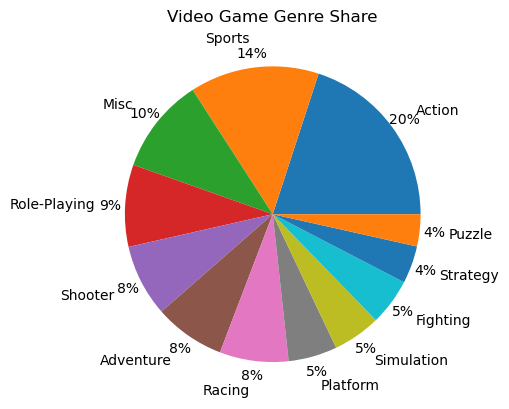

In [14]:
plt.pie(sales_df.Genre.value_counts(), labels=sales_df.Genre.value_counts().index, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Video Game Genre Share')
plt.ylabel(' ')
plt.show()

### Platform Column

### Video Game Sales Count according to Platform

In [15]:
sales_df.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

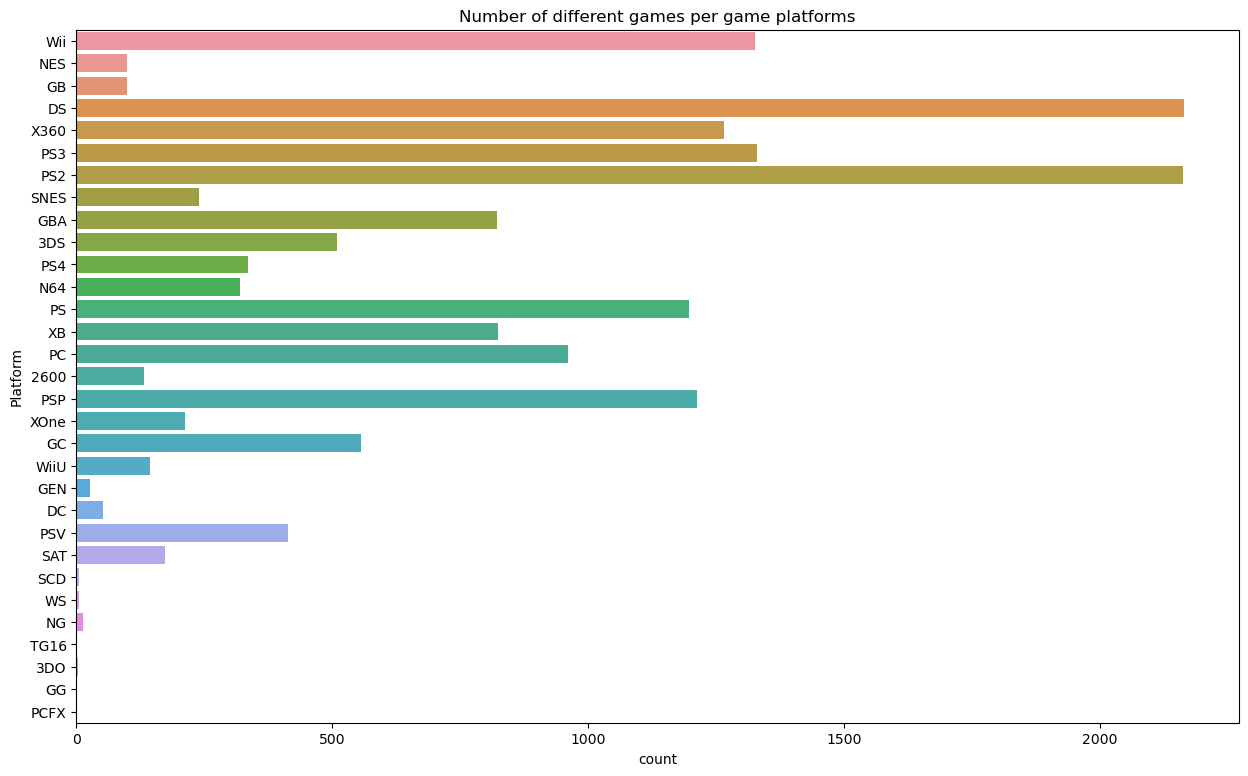

In [17]:
plt.figure(figsize = (15,9))
plt.title('Number of different games per game platforms')
sns.countplot(y='Platform', data=sales_df)
plt.show()

### Publisher Column

### Publishers with game counts above 100

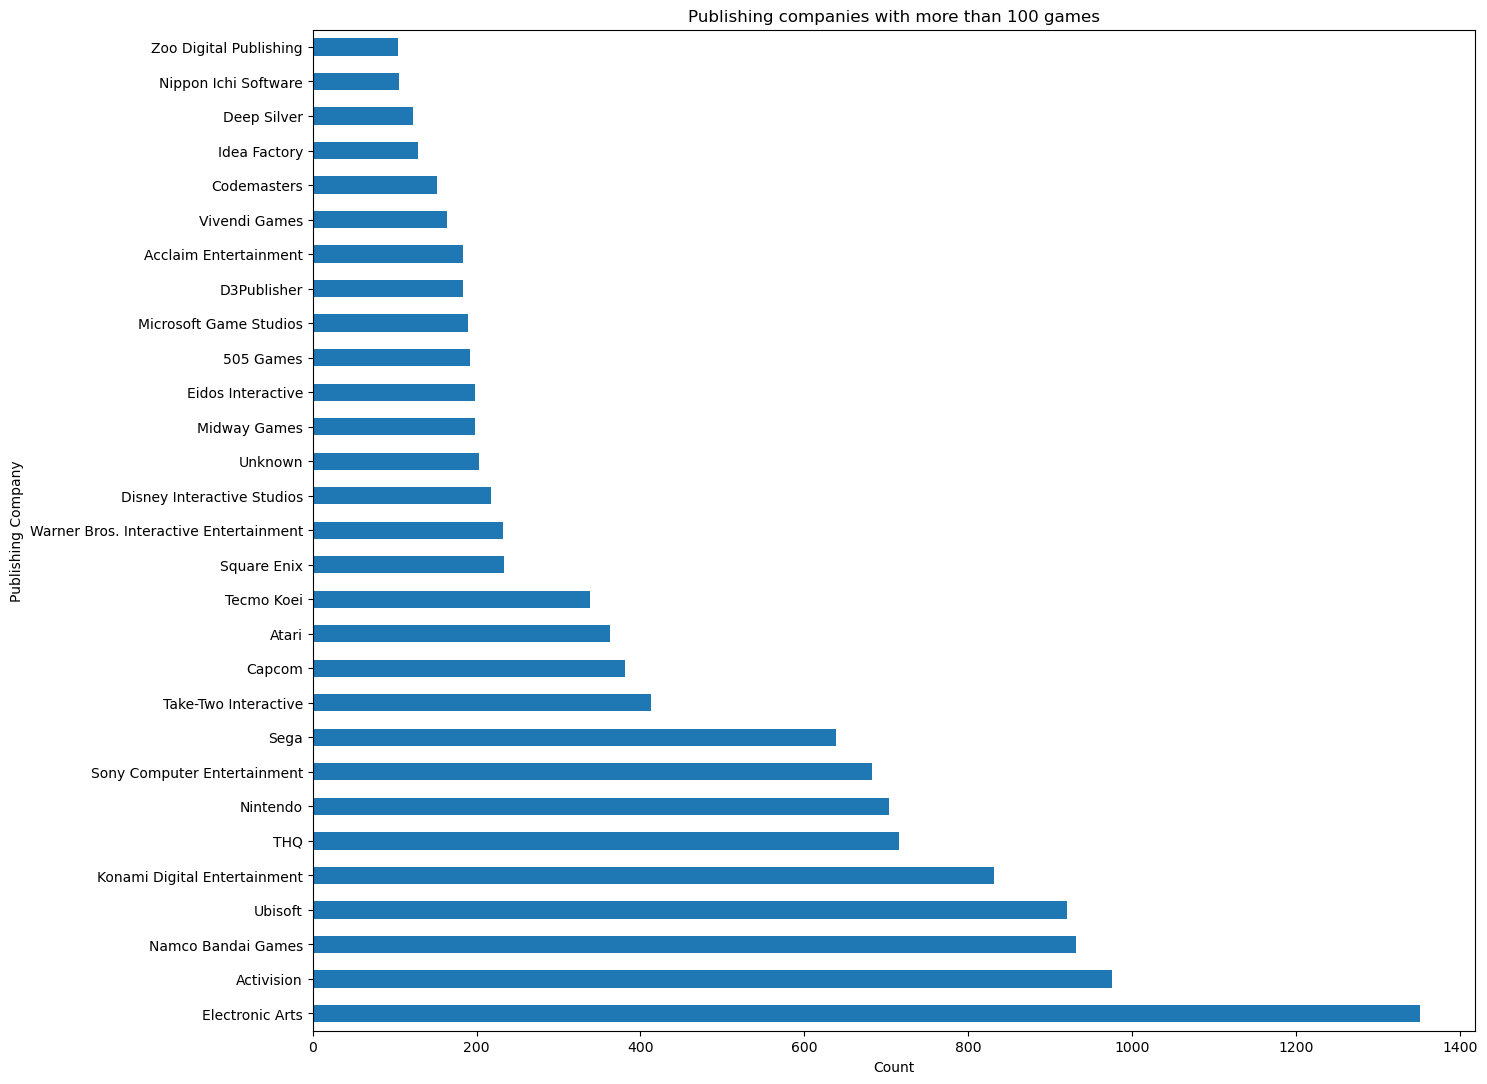

In [25]:
plt.figure(figsize=(15,13))
publishers = sales_df.Publisher.value_counts()
publishers = publishers[publishers.values > 100]
publishers.plot(kind = 'barh')
plt.xlabel('Count')
plt.ylabel('Publishing Company')
plt.title('Publishing companies with more than 100 games')
plt.show()

## Q&A

### What are the top five game genres?

In [26]:
sales_df.Genre.value_counts().head(5)

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: Genre, dtype: int64

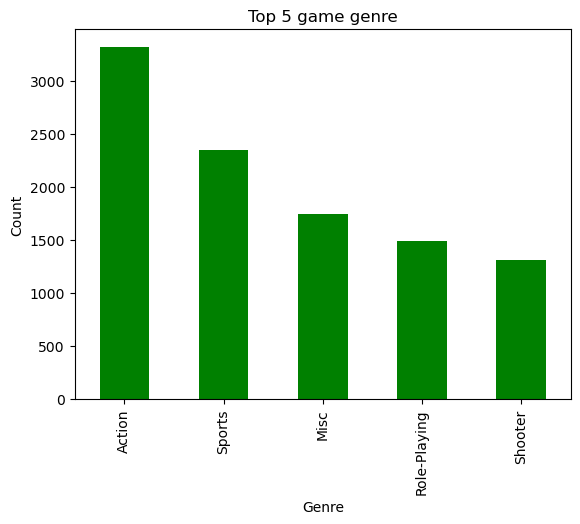

In [27]:
sales_df.Genre.value_counts().head(5).plot(kind = 'bar', color = 'g')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 5 game genre')
plt.show()

### Action and Sports are the top genre video games

## Which region has the largest share in the global video games sales?

In [29]:
Total_Video_Games_Sales = sales_df.Global_Sales.sum()

In [30]:
North_America_Sales_percent = (sales_df.NA_Sales.sum()*100)/Total_Video_Games_Sales
Europe_Sales_percent = (sales_df.EU_Sales.sum()*100)/Total_Video_Games_Sales
Japan_Sales_percent = (sales_df.JP_Sales.sum()*100)/Total_Video_Games_Sales
Other_Region_Sales_percent = (sales_df.Other_Sales.sum()*100)/Total_Video_Games_Sales

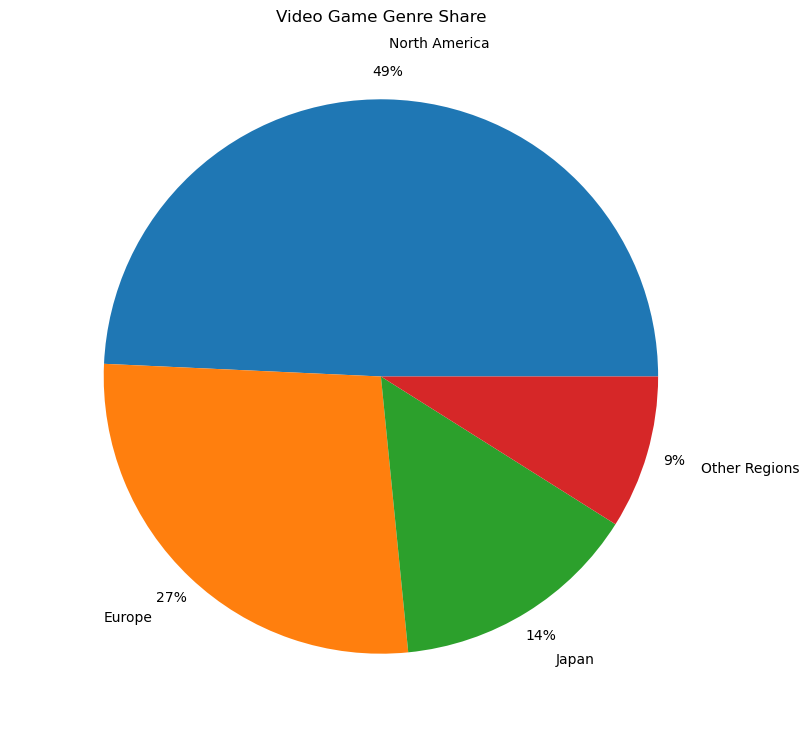

In [31]:
plt.figure(figsize=(16,9))
plt.pie([North_America_Sales_percent, Europe_Sales_percent, Japan_Sales_percent, Other_Region_Sales_percent], labels=['North America', 'Europe', 'Japan', 'Other Regions'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Video Game Genre Share')
plt.ylabel(' ')
plt.show()

### Major shareholder is North America which is 49%

## What are the top 5 highest-grossing games in North America?

In [32]:
sales_NA_sorted_df = sales_df.sort_values(by = ['NA_Sales'], ascending = False)
sales_NA_sorted_df.head()[['Name', 'NA_Sales']]

,Name,NA_Sales
0,Wii Sports,41.49
1,Super Mario Bros.,29.08
9,Duck Hunt,26.93
5,Tetris,23.20
2,Mario Kart Wii,15.85


## Which game has the highest sales in the other region(Excluding North America, Europe and Japan)?

In [33]:
sales_Other_sorted_df = sales_df.sort_values(by = ['Other_Sales'], ascending = False)
sales_NA_sorted_df.head(1)[['Name', 'Other_Sales']]

,Name,Other_Sales
0,Wii Sports,8.46


### Wii Sports has the highest sales in the other regions which are 8.46 million.

## Which game has the highest difference in their sales in North America and Europe?

In [34]:
sales_df['NA_EU_Sales_Diff'] = abs(sales_df['NA_Sales'] - sales_df['EU_Sales'])
sales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,year_only,NA_EU_Sales_Diff
0,1,Wii Sports,Wii,NaT,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,NaN,12.47
1,2,Super Mario Bros.,NES,NaT,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,25.50
2,3,Mario Kart Wii,Wii,NaT,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,NaN,2.97
3,4,Wii Sports Resort,Wii,NaT,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,NaN,4.74
4,5,Pokemon Red/Pokemon Blue,GB,NaT,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,2.38


In [35]:
sales_df.sort_values(by = ['NA_EU_Sales_Diff'], ascending = False).head(1)[['Name', 'NA_EU_Sales_Diff']]

,Name,NA_EU_Sales_Diff
9,Duck Hunt,26.3


### Duck Hunt has the highest difference in their sales when the comparison is made between North America and Europe.

## Conclusions

### Action games have highest count in dataset
### Puzzle games have leat count in dataset
### Most games are available of DS and PS2
### Wii Sports has the highest sales in the other regions which are 8.46 million.